<a href="https://colab.research.google.com/github/kristinak15/QM2-Group-4/blob/main/US_GM_crops_Visualisations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploring the GM production dataset

In [3]:
import pandas as pd

import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [4]:
US_gm_crops = pd.read_csv('/content/alltablesGEcrops.csv')
US_gm_crops.head()

,Table,Unit,Variety,Year,Attribute,Value
0,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Illinois,13
1,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Indiana,7
2,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Iowa,23
3,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Kansas,25
4,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Michigan,8


Cleaning the data, getting rid of asterisks and full stops

In [5]:
US_gm_crops=US_gm_crops.drop(columns='Table')

In [6]:
US_gm_crops["Value"].replace({".": "0"}, inplace=True)

In [7]:
US_gm_crops["Value"].replace({"*": "0"}, inplace=True)

Converting the Value column to integers for graphing

In [8]:
US_gm_crops["Value"]=US_gm_crops["Value"].astype(float).astype(int)

In [9]:
US_gm_crops.head()

,Unit,Variety,Year,Attribute,Value
0,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Illinois,13
1,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Indiana,7
2,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Iowa,23
3,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Kansas,25
4,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Michigan,8


In [10]:
US_gm_crops.dtypes

Unit         object
Variety      object
Year          int64
Attribute    object
Value         int64
dtype: object

---

Separating the data frame into smaller data frames in order to graph them

In [11]:
gm_corn_general = US_gm_crops[(US_gm_crops['Variety']=='All GE varieties') & (US_gm_crops['Attribute']=='U.S.')&(US_gm_crops['Unit']=='Percent of corn planted')]

In [12]:
gm_soy_general = US_gm_crops[(US_gm_crops['Attribute']=='U.S.') & (US_gm_crops['Unit']=='Percent of all soybeans planted')& (US_gm_crops['Variety']=='Herbicide-tolerant only')]

In [13]:
gm_cotton_general = US_gm_crops[(US_gm_crops['Variety']=='All GE varieties') & (US_gm_crops['Attribute']=='U.S.')&(US_gm_crops['Unit']=='Percent of upland cotton planted')]

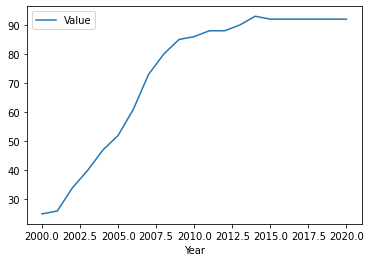

In [14]:
gm_corn_general.plot(x='Year', y='Value')

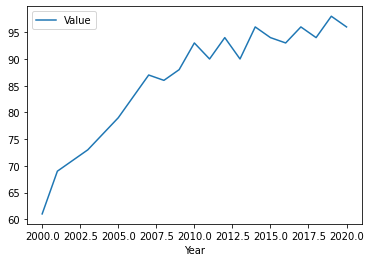

In [15]:
gm_cotton_general.plot(x='Year', y='Value')

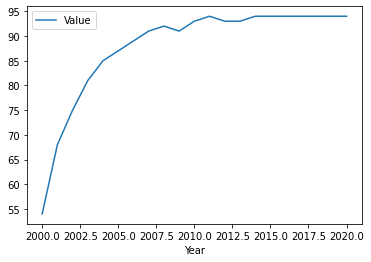

In [16]:
gm_soy_general.plot(x='Year', y='Value')

In [17]:
gm_corn_general.describe()

,Year,Value
count,21.000000,21.000000
mean,2010.000000,72.380952
std,6.204837,24.538696
min,2000.000000,25.000000
25%,2005.000000,52.000000
50%,2010.000000,86.000000
75%,2015.000000,92.000000
max,2020.000000,93.000000


In [18]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')



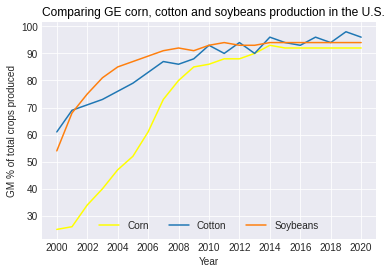

In [19]:
ax = gm_corn_general.plot(x='Year', y = 'Value', kind = 'line', color = 'yellow', label='Corn')
gm_cotton_general.plot(x='Year', y = 'Value', kind = 'line', label='Cotton', ax=ax)
gm_soy_general.plot(x='Year', y = 'Value', kind = 'line', label='Soybeans', ax=ax)

plt.legend(loc=8, ncol=8)
plt.title("Comparing GE corn, cotton and soybeans production in the U.S.", loc='left', fontsize=12, fontweight=0, color='black')
plt.xlabel("Year")
plt.ylabel("GM % of total crops produced")
plt.xticks(np.arange(2000, 2022, 2))

plt.savefig('general_gm_crops.png')

---

Bar charts by state

In [20]:
corn_state_2020 = US_gm_crops[(US_gm_crops['Variety']=='All GE varieties') &(US_gm_crops['Unit']=='Percent of corn planted')&(US_gm_crops['Year']==2020)]

In [21]:
corn_state_2020.head()

,Unit,Variety,Year,Attribute,Value
1245,Percent of corn planted,All GE varieties,2020,Illinois,94
1246,Percent of corn planted,All GE varieties,2020,Indiana,86
1247,Percent of corn planted,All GE varieties,2020,Iowa,90
1248,Percent of corn planted,All GE varieties,2020,Kansas,96
1249,Percent of corn planted,All GE varieties,2020,Michigan,89


In [22]:
corn_state_2020=corn_state_2020.drop(columns='Unit')
corn_state_2020=corn_state_2020.drop(columns='Variety')
corn_state_2020=corn_state_2020.drop(columns='Year')

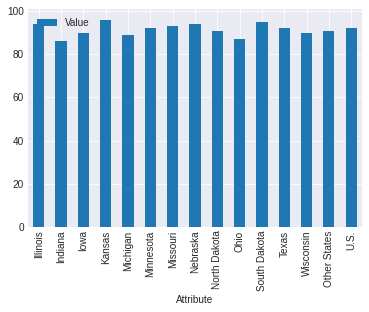

In [23]:
corn_state_2020.plot.bar('Attribute', width=0.5)

In [24]:
cotton_state_2020 = US_gm_crops[(US_gm_crops['Variety']=='All GE varieties') &(US_gm_crops['Unit']=='Percent of upland cotton planted')&(US_gm_crops['Year']==2020)]

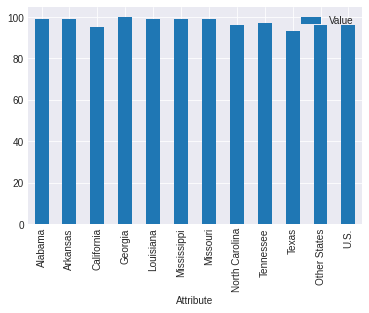

In [25]:
cotton_state_2020.plot.bar('Attribute', 'Value')

In [26]:
soy_state_2020 = US_gm_crops[(US_gm_crops['Variety']=='Herbicide-tolerant only') &(US_gm_crops['Unit']=='Percent of all soybeans planted')&(US_gm_crops['Year']==2020)]

In [27]:
soy_state_2020=soy_state_2020.drop(columns='Unit')
soy_state_2020=soy_state_2020.drop(columns='Variety')
soy_state_2020=soy_state_2020.drop(columns='Year')

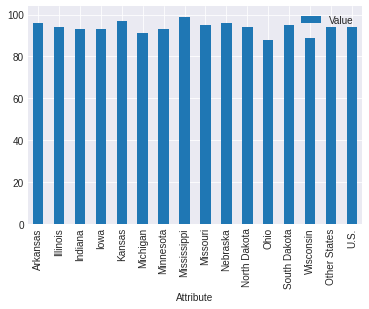

In [28]:
soy_state_2020.plot.bar('Attribute')

The bar charts are a bit useless because we do not have the actual amount of GM crops planted

---

Combining the percentage data fro GM crops with the crop acreage 

In [29]:
US_gm_crops.head()

,Unit,Variety,Year,Attribute,Value
0,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Illinois,13
1,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Indiana,7
2,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Iowa,23
3,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Kansas,25
4,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Michigan,8


unit = ['Percent of corn planted']
variety = ['All GE varieties']
corn = US_gm_crops[~US_gm_crops.Unit.isin(unit) & 
           US_gm_crops.Variety.isin(variety)]

The above code did not work...

In [30]:
soy_state = US_gm_crops[(US_gm_crops['Variety']=='Herbicide-tolerant only') &(US_gm_crops['Unit']=='Percent of all soybeans planted')&(US_gm_crops['Year']>2006)]

In [31]:
soy_state.head()

,Unit,Variety,Year,Attribute,Value
2380,Percent of all soybeans planted,Herbicide-tolerant only,2007,Arkansas,92
2381,Percent of all soybeans planted,Herbicide-tolerant only,2007,Illinois,88
2382,Percent of all soybeans planted,Herbicide-tolerant only,2007,Indiana,94
2383,Percent of all soybeans planted,Herbicide-tolerant only,2007,Iowa,94
2384,Percent of all soybeans planted,Herbicide-tolerant only,2007,Kansas,92


In [32]:
corn_state = US_gm_crops[(US_gm_crops['Variety']=='All GE varieties') &(US_gm_crops['Unit']=='Percent of corn planted')&(US_gm_crops['Year']>2006)]

In [33]:
corn_state.tail()

,Unit,Variety,Year,Attribute,Value
1255,Percent of corn planted,All GE varieties,2020,South Dakota,95
1256,Percent of corn planted,All GE varieties,2020,Texas,92
1257,Percent of corn planted,All GE varieties,2020,Wisconsin,90
1258,Percent of corn planted,All GE varieties,2020,Other States,91
1259,Percent of corn planted,All GE varieties,2020,U.S.,92


In [53]:
US_acreage = pd.read_csv('/content/Corn and soybean acreage state final.csv')
US_acreage.head()

,Year,State,CORN,SOYBEANS
0,2007,Illinois,12978431.0,8143591.0
1,2007,Indiana,6346302.0,4686889.0
2,2007,Iowa,13946009.0,8474500.0
3,2007,Kansas,3851066.0,2558736.0
4,2007,Michigan,2600978.0,1682468.0


In [54]:
US_acreage["State"].replace({"US": "U.S."}, inplace=True)

In [55]:
US_acreage = US_acreage.rename(columns={'State': 'Attribute'})

In [56]:
US_acreage_corn = US_acreage.drop(columns='SOYBEANS')

In [57]:
US_acreage_soy = US_acreage.drop(columns='CORN')

In [58]:
US_acreage_corn.tail()

,Year,Attribute,CORN
177,2019,Ohio,2725862.0
178,2019,South Dakota,4255906.0
179,2019,Texas,2426131.0
180,2019,Wisconsin,3723324.0
181,2019,U.S.,87176200.0


In [63]:
US_acreage_corn["CORN"]=US_acreage_corn["CORN"].astype(float).astype(int)

In [64]:
US_acreage_soy["SOYBEANS"]=US_acreage_soy["SOYBEANS"].astype(float).astype(int)

Now need to merge the GM crop data with the general acreages of corn and soybeans

In [60]:
#US_acreage_corn and corn_state and after soy_state and US_acreage_soy

In [65]:
US_acreage_corn.dtypes

Year          int64
Attribute    object
CORN          int64
dtype: object

In [80]:
test = corn_state.merge(US_acreage_corn, left_on=['Attribute','Year' ], right_on=['Attribute','Year' ], how='outer' )

In [74]:
corn_state

,Unit,Variety,Year,Attribute,Value
1050,Percent of corn planted,All GE varieties,2007,Illinois,74
1051,Percent of corn planted,All GE varieties,2007,Indiana,59
1052,Percent of corn planted,All GE varieties,2007,Iowa,78
1053,Percent of corn planted,All GE varieties,2007,Kansas,82
1054,Percent of corn planted,All GE varieties,2007,Michigan,60
...,...,...,...,...,...
1255,Percent of corn planted,All GE varieties,2020,South Dakota,95
1256,Percent of corn planted,All GE varieties,2020,Texas,92
1257,Percent of corn planted,All GE varieties,2020,Wisconsin,90
1258,Percent of corn planted,All GE varieties,2020,Other States,91
